# Peruvian Ministers Network (2011-2016 / 2021-2022)

This project focuses on mapping the network of Peruvian ministers from Ollanta Humalas’s presidential term (2011-2016) and Pedro Castillo's government (2021-2022). It analyzes two key variables: the university from which each minister graduated and their region of origin. The repository contains all the relevant data and code for calculating and visualizing the network, with a final summary highlighting the most significant findings.s

**Warning:** This is primarily a code exercise. The data was AI-generated and has not been fully fact-checked, so it may contain inaccuracies.

## 1. Data details: AI-generated peruvian ministers network

In [1]:
import pandas as pd

In [4]:
pip install --upgrade openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 660.6 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 751.6 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 731.4 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 731.4 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/250.9 kB 737.3 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 655.1 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.9 kB 626.9 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 617.1 kB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [2]:
min_net_FULL = pd.read_excel('networks_minister.xlsx') 

In [3]:
min_net_FULL.head()

,Nombre,Ministerio,Presidente,U_Pregrado,Región_Procedencia
0,Salomón Lerner Ghitis,PCM,Ollanta Humala,Pontificia Universidad Católica del Perú,Lima
1,Óscar Valdés Dancuart,PCM,Ollanta Humala,Escuela Militar de Chorrillos,Tacna
2,Juan Jiménez Mayor,PCM,Ollanta Humala,Pontificia Universidad Católica del Perú,Lima
3,César Villanueva Arévalo,PCM,Ollanta Humala,Universidad Nacional Mayor de San Marcos,San Martín
4,René Cornejo Díaz,PCM,Ollanta Humala,Universidad Nacional de Ingeniería,Arequipa


In [4]:
# Check the column names to ensure they match what we expect
print(min_net_FULL.columns)

Index(['Nombre', 'Ministerio', 'Presidente', 'U_Pregrado',
       'Región_Procedencia'],
      dtype='object')


In [5]:
#Two presidential terms
min_net_FULL['Presidente'].unique()

array(['Ollanta Humala', 'Pedro Castillo'], dtype=object)

## 2. Creating our firsts nets

For practice purposes, we'll focus on the first half of the dataset first, specifically the information from **Ollanta Humala's government**.

In [35]:
# Create min_net by dropping all rows where 'Presidente' is 'Pedro Castillo'
min_net = min_net_FULL[min_net_FULL['Presidente'] != 'Pedro Castillo'].copy()

### 2.1. Simple Network: Connections Based on Undergraduate University

This first version uses only two variables: Nombre (name) and U_Pregrado (undergraduate university), where the nodes represent the ministers and the edges indicate shared undergraduate universities.

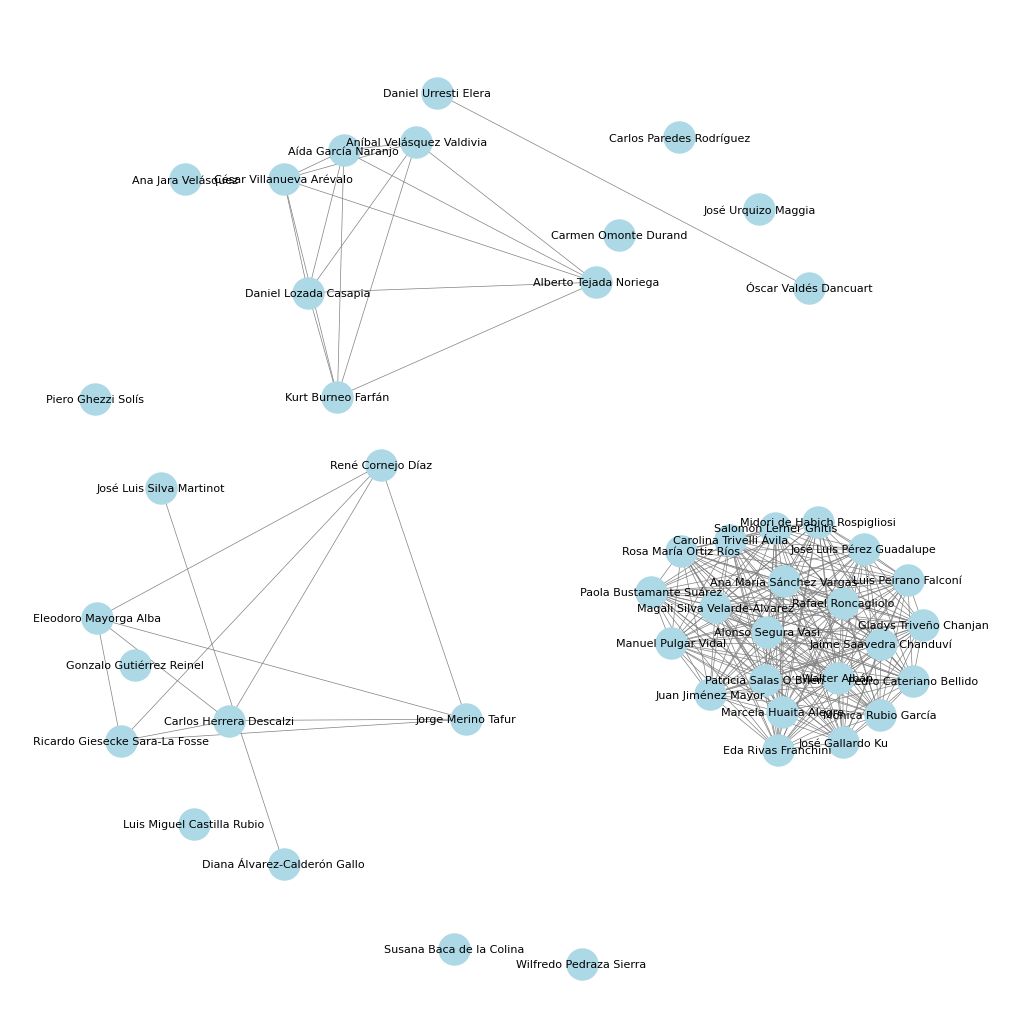

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    
    # Add the minister as a node with university as an attribute
    G.add_node(minister, university=university)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Draw the graph with improved layout
plt.figure(figsize=(10, 10))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, edge_color='gray', width=0.5)

plt.show()

In [23]:
#As we can see, the majority of Ollanta Humala's ministers are from the Pontifical Catholic University of Peru. That is the biggest network when analyzing minister's undergraduate university.Notice that 7 ministers don't belong to any network. 

### 2.2 Colored Network: Ministers by Undergraduate University and Ministry

Now we add some color using a third variable: Ministerio (ministry)

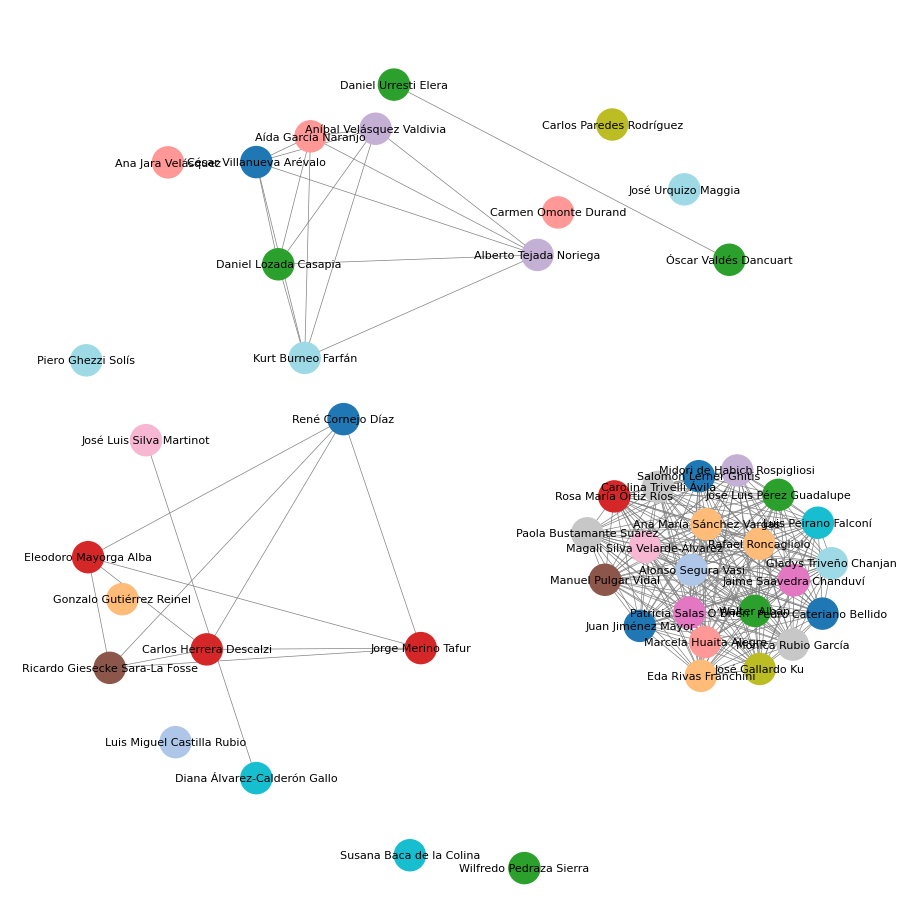

In [37]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    ministry = row['Ministerio']
    
    # Add the minister as a node with university and ministry as attributes
    G.add_node(minister, university=university, ministry=ministry)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Generate a dynamic color map for ministries
unique_ministries = min_net['Ministerio'].unique() 
colors = plt.cm.get_cmap('tab20', len(unique_ministries))  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_ministries, [colors(i) for i in range(len(unique_ministries))]))

# Create a color list for the nodes based on their ministry
node_colors = [color_map[G.nodes[node]['ministry']] for node in G.nodes]

# Draw the graph with improved layout
plt.figure(figsize=(9, 9))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.show()

Now we add some atributtes

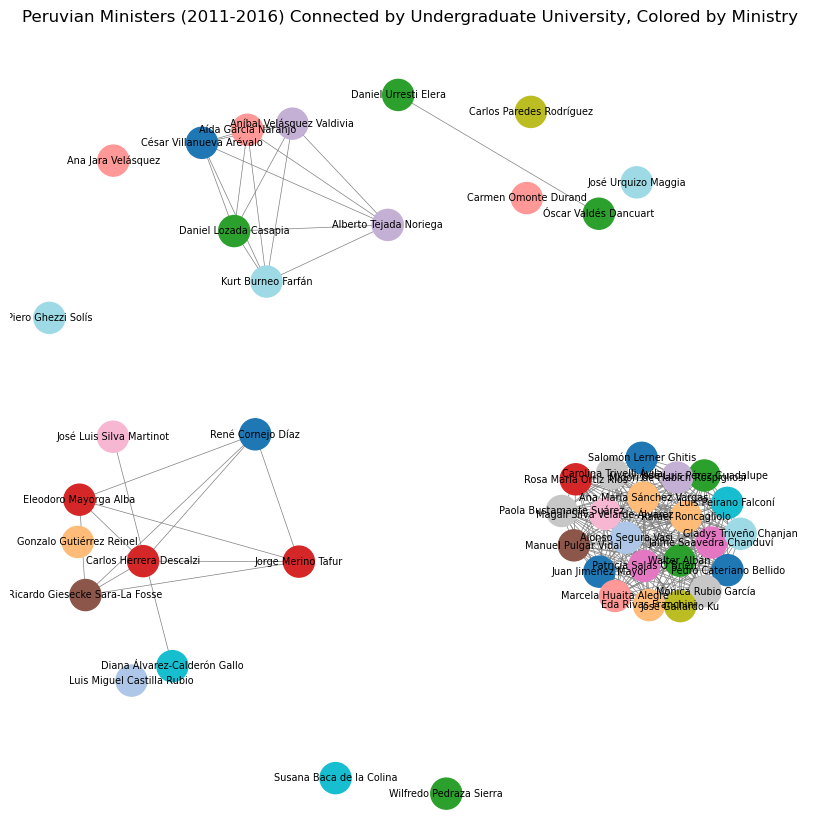

In [25]:
# Draw the graph with improved layout
plt.figure(figsize=(8, 8))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=0.8, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=7, edge_color='gray', width=0.5)

plt.title("Peruvian Ministers (2011-2016) Connected by Undergraduate University, Colored by Ministry")
plt.show()

**What about their region of origin?** (Región_Procedencia)

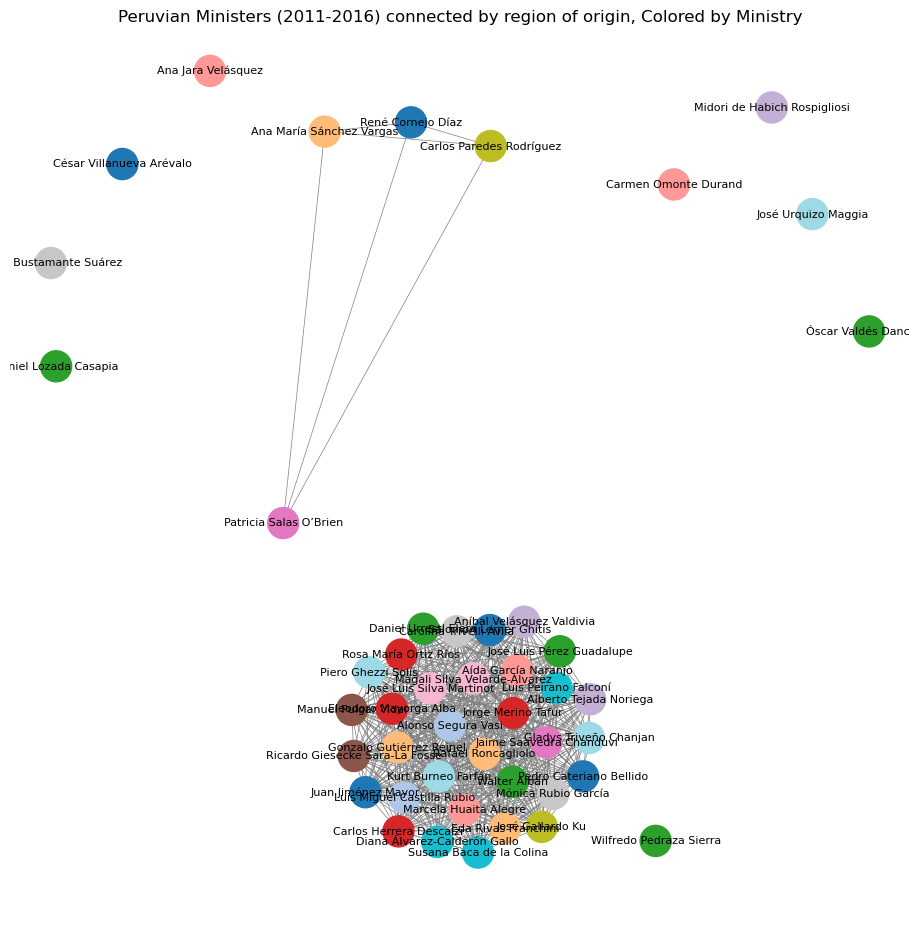

In [38]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    ministry = row['Ministerio']
    region = row['Región_Procedencia']
    
    # Add the minister as a node with university and ministry as attributes
    G.add_node(minister, university=university, ministry=ministry, region=region)
    
# Create edges based on shared region of origin
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['Región_Procedencia'] == row2['Región_Procedencia']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Generate a dynamic color map for ministries
unique_ministries = min_net['Ministerio'].unique() 
colors = plt.cm.get_cmap('tab20', len(unique_ministries))  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_ministries, [colors(i) for i in range(len(unique_ministries))]))

# Create a color list for the nodes based on their ministry
node_colors = [color_map[G.nodes[node]['ministry']] for node in G.nodes]

# Draw the graph with improved layout
plt.figure(figsize=(9, 9))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.title("Peruvian Ministers (2011-2016) connected by region of origin, Colored by Ministry")
plt.show()

There are only two networks. The biggest one belongs to Lima (34 ministers) while the send one belongs to Arequipa (4 ministers)

Now we'llfocus only on **Pedro Castillo's** presidential term

In [26]:
# Create min_net by dropping all rows where 'Presidente' is 'Pedro Castillo'
min_net = min_net_FULL[min_net_FULL['Presidente'] != 'Ollanta Humala'].copy()

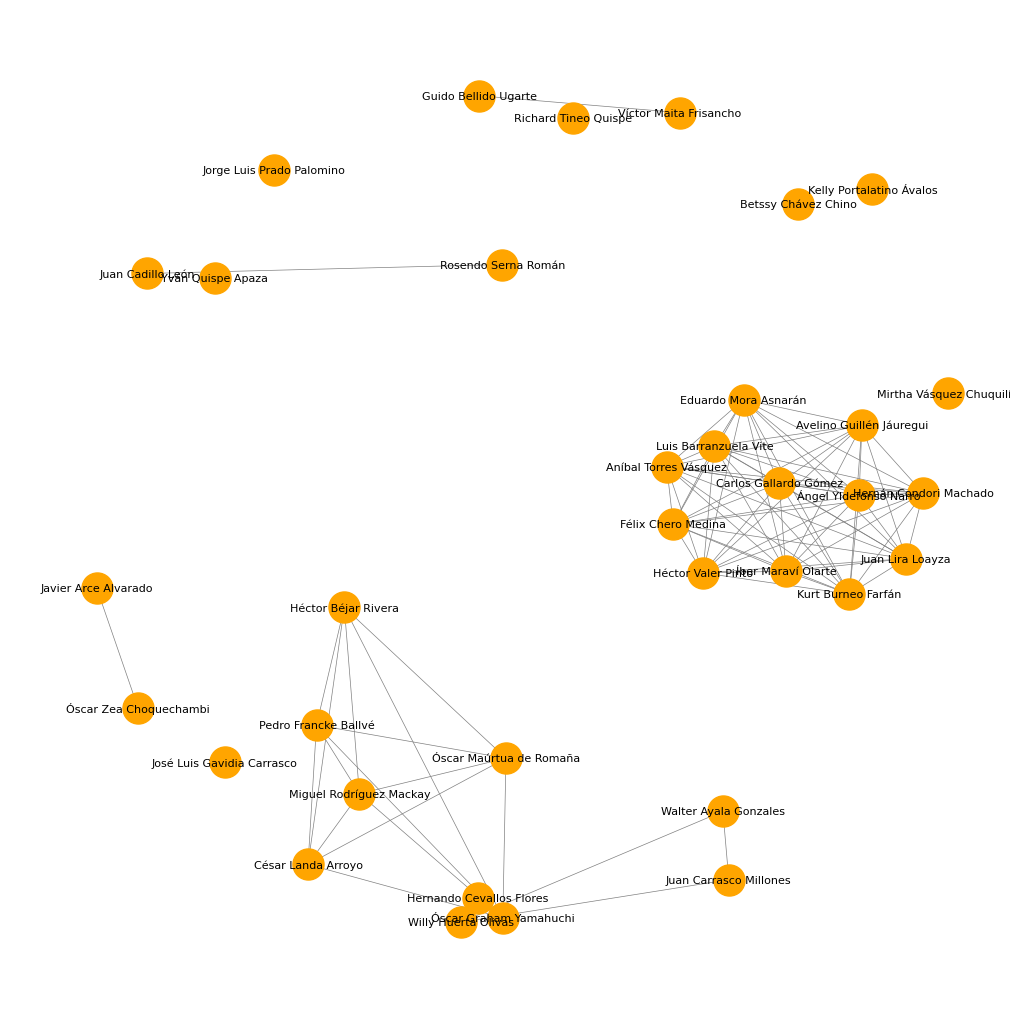

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    
    # Add the minister as a node with university as an attribute
    G.add_node(minister, university=university)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Draw the graph with improved layout
plt.figure(figsize=(10, 10))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='orange', font_size=8, edge_color='gray', width=0.5)

plt.show()

We can see that there are two principal networks which belong to the Universidad Nacional Mayor de San Marcos (12 ministers) and the Pontificia Universidad Católica del Perú (10 ministers). Notice that 4 ministers don't belong to any network

In [ ]:
Now we add some color using a third variable: Ministerio (ministry)

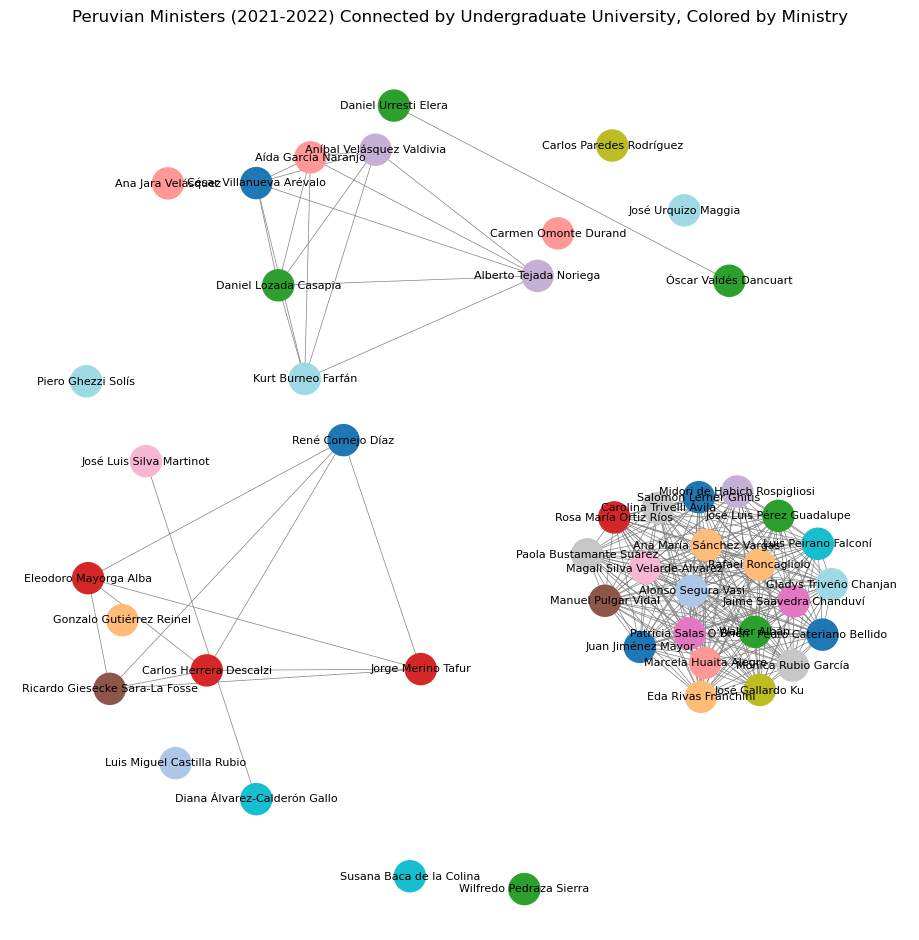

In [40]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    ministry = row['Ministerio']
    
    # Add the minister as a node with university and ministry as attributes
    G.add_node(minister, university=university, ministry=ministry)
    
# Create edges based on shared universities
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['U_Pregrado'] == row2['U_Pregrado']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Generate a dynamic color map for ministries
unique_ministries = min_net['Ministerio'].unique() 
colors = plt.cm.get_cmap('tab20', len(unique_ministries))  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_ministries, [colors(i) for i in range(len(unique_ministries))]))

# Create a color list for the nodes based on their ministry
node_colors = [color_map[G.nodes[node]['ministry']] for node in G.nodes]

# Draw the graph with improved layout
plt.figure(figsize=(9, 9))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.title("Peruvian Ministers (2021-2022) Connected by Undergraduate University, Colored by Ministry")
plt.show()

**What about their region of origin?** Let's create a network based on their shared region of origin (Region_Procedencia) and color the nodes according to their respective ministries.

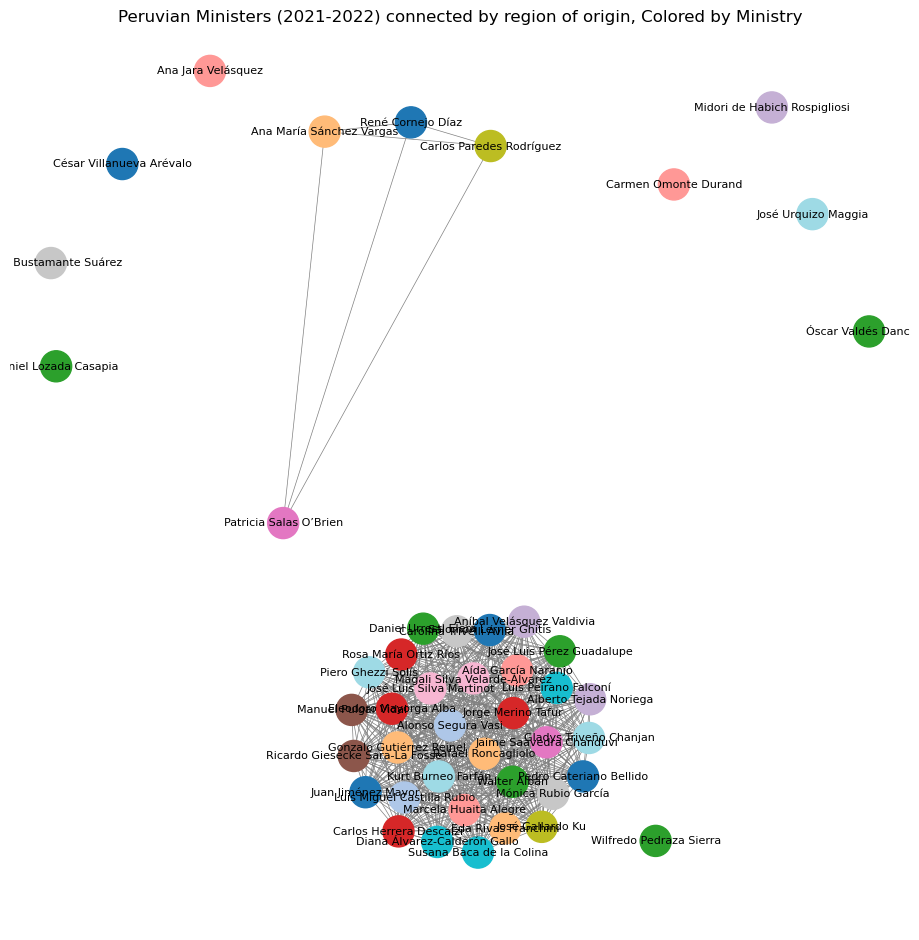

In [41]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a graph
G = nx.Graph()

# Loop through the dataframe to create nodes and edges
for index, row in min_net.iterrows():
    minister = row['Nombre']
    university = row['U_Pregrado']
    ministry = row['Ministerio']
    region = row['Región_Procedencia']
    
    # Add the minister as a node with university and ministry as attributes
    G.add_node(minister, university=university, ministry=ministry, region=region)
    
# Create edges based on shared region of origin
for i, row1 in min_net.iterrows():
    for j, row2 in min_net.iterrows():
        if i != j and row1['Región_Procedencia'] == row2['Región_Procedencia']:
            G.add_edge(row1['Nombre'], row2['Nombre'])

# Remove self-loops (if any)
G.remove_edges_from(nx.selfloop_edges(G))

# Generate a dynamic color map for ministries
unique_ministries = min_net['Ministerio'].unique() 
colors = plt.cm.get_cmap('tab20', len(unique_ministries))  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_ministries, [colors(i) for i in range(len(unique_ministries))]))

# Create a color list for the nodes based on their ministry
node_colors = [color_map[G.nodes[node]['ministry']] for node in G.nodes]

# Draw the graph with improved layout
plt.figure(figsize=(9, 9))

# Using spring_layout for better node distribution
pos = nx.spring_layout(G, k=1, seed=42)  # Adjust 'k' to control node spacing

# Draw the network
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', width=0.5)

plt.title("Peruvian Ministers (2021-2022) connected by region of origin, Colored by Ministry")
plt.show()

As we can see, the majority of them are from Lima, which is interesting considering that Pedro Castillo's discourse was to empower the  rural and marginalized communities outside of the capital. There are four additional networks, but they are less populated, meaning they have fewer nodes compared to the others. These belong to Puno (4 ministers), Piura (2 ministers), Cajamarca (2 ministers) and Cusco (2 ministers). 

In [ ]:
To summarize our findings:
- 